# Klasifikasi Penyakit Tanaman Apel Dari Citra Daun Menggunakan Metode Convolutional Neural Network


In [1]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Loading data 
train_dir = "train"
test_dir  = "val"

In [3]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

4 Classes
880 Train images
200 Test images


In [5]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 880 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [7]:
# The name of the class
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3}

In [8]:
# Build CNN Architecture
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))

In [9]:
# displays the summary of CNN models
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [10]:
# PROSES TRAINING DATA
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 880 images belonging to 4 classes.


In [11]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs =10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)


Epoch 1/10
27/27 [==============================] - 43s 2s/step - loss: 1.2926 - accuracy: 0.3550 - val_loss: 0.8748 - val_accuracy: 0.6273
Epoch 2/10
27/27 [==============================] - 41s 2s/step - loss: 0.6318 - accuracy: 0.7476 - val_loss: 0.4609 - val_accuracy: 0.8252
Epoch 3/10
27/27 [==============================] - 42s 2s/step - loss: 0.4448 - accuracy: 0.8373 - val_loss: 0.5089 - val_accuracy: 0.8287
Epoch 4/10
27/27 [==============================] - 43s 2s/step - loss: 0.4502 - accuracy: 0.8432 - val_loss: 0.3599 - val_accuracy: 0.8831
Epoch 5/10
27/27 [==============================] - 43s 2s/step - loss: 0.3533 - accuracy: 0.8644 - val_loss: 0.2302 - val_accuracy: 0.9236
Epoch 6/10
27/27 [==============================] - 44s 2s/step - loss: 0.3723 - accuracy: 0.8703 - val_loss: 0.2669 - val_accuracy: 0.9178
Epoch 7/10
27/27 [==============================] - 43s 2s/step - loss: 0.2925 - accuracy: 0.8844 - val_loss: 0.2658 - val_accuracy: 0.9028
Epoch 8/10
27/27 [==

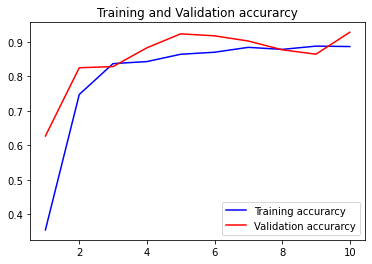

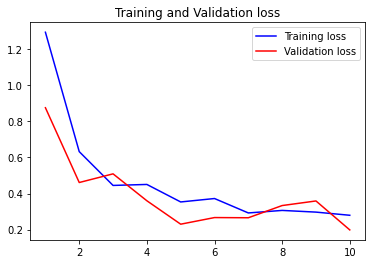

In [12]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [13]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

7/7 [==============================] - 1s 190ms/step - loss: 0.2531 - accuracy: 0.9150
Test score is 0.25307124853134155
Test accuracy is 0.9150000214576721


In [14]:
model.save('my_model.h5')

In [15]:
#https://medium.com/@mmasdar/deteksi-penyakit-pada-pohon-apel-dengan-menggunakan-machine-learning-convolutional-neural-network-4979a01328